In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
import os
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
class LazyLoadDataset(Dataset):
    def __init__(self, path, train=0, transform=None):
        self.transform = transform
        self.train = train

        if self.train == 0:
            self.pathX = path + "train/"
        elif self.train == 1:
            self.pathX = path + "test/"
        else:
            self.pathX = path + "val/"

        self.pathY = "/content/drive/MyDrive/2023_Spring/Advanced_Topics_in_DS/Project/small_processed_data/image_data.csv"

        self.img_data = pd.read_csv('/content/drive/MyDrive/2023_Spring/Advanced_Topics_in_DS/Project/small_processed_data/image_data.csv')
        self.train_idx = self.img_data.index[self.img_data['folder'] == 'train'].tolist()
        self.test_idx = self.img_data.index[self.img_data['folder'] == 'test'].tolist()
        self.val_idx = self.img_data.index[self.img_data['folder'] == 'val'].tolist()
        
    def __getitem__(self, idx):
        # f = self.data[idx]

        #X
        if self.train == 0:
            i = self.train_idx[idx]
        elif self.train == 1:
            i = self.test_idx[idx]
        else:
            i = self.val_idx[idx]

        img = cv2.imread(self.pathX + str(i) + ".jpg")

        if self.transform is not None:
            img = self.transform(img)

        #Y
        Y = self.img_data['label'][i]

        return (img,i), Y

    def __len__(self):
        if self.train == 0:
            l = len(self.train_idx)
        elif self.train == 1:
            l = len(self.test_idx)
        else:
            l = len(self.val_idx)
        return l

In [11]:
# train_dataset = LazyLoadDataset("/content/drive/MyDrive/2023_Spring/Advanced_Topics_in_DS/Project/small_processed_data/", train=0, transform = transforms.Compose([transforms.ToTensor(),
#                                                                                                         transforms.Normalize((0.1307,), (0.3081,))
#                                                                                                        ]))
# train_dataset = LazyLoadDataset("/content/drive/MyDrive/2023_Spring/Advanced_Topics_in_DS/Project/small_processed_data/high_pass_filter/", train=0, transform = transforms.Compose([transforms.ToTensor(),
#                                                                                                         transforms.Normalize((0.1307,), (0.3081,))
#                                                                                                        ]))
train_dataset = LazyLoadDataset("/content/drive/MyDrive/2023_Spring/Advanced_Topics_in_DS/Project/small_processed_data/to_hsv/", train=0, transform = transforms.Compose([transforms.ToTensor(),
                                                                                                        transforms.Normalize((0.1307,), (0.3081,))
                                                                                                       ]))
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

# test_dataset = LazyLoadDataset("/content/drive/MyDrive/2023_Spring/Advanced_Topics_in_DS/Project/small_processed_data/", train=1, transform = transforms.Compose([transforms.ToTensor(),
#                                                                                                         transforms.Normalize((0.1307,), (0.3081,))
#                                                                                                        ]))
test_dataset = LazyLoadDataset("/content/drive/MyDrive/2023_Spring/Advanced_Topics_in_DS/Project/small_processed_data/to_hsv/", train=1, transform = transforms.Compose([transforms.ToTensor(),
                                                                                                        transforms.Normalize((0.1307,), (0.3081,))
                                                                                                       ]))
# test_dataset = LazyLoadDataset("/content/drive/MyDrive/2023_Spring/Advanced_Topics_in_DS/Project/small_processed_data/high_pass_filter/", train=1, transform = transforms.Compose([transforms.ToTensor(),
#                                                                                                         transforms.Normalize((0.1307,), (0.3081,))
#                                                                                                        ]))
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

In [ ]:
#visualize one image from each class
import torchvision

img = []
visited_labels = set()
train_loader_iter = iter(train_loader)

while len(visited_labels) < 2:
    (features, idx), labels = next(train_loader_iter)
    for i, label in enumerate(labels):
        if label not in visited_labels:
            visited_labels.add(label)
            img.append(features[i])
            print(label, idx[i])
            
img = torchvision.utils.make_grid(img)
plt.imshow(img.permute(1, 2, 0))

tensor(2405)
tensor(9901)


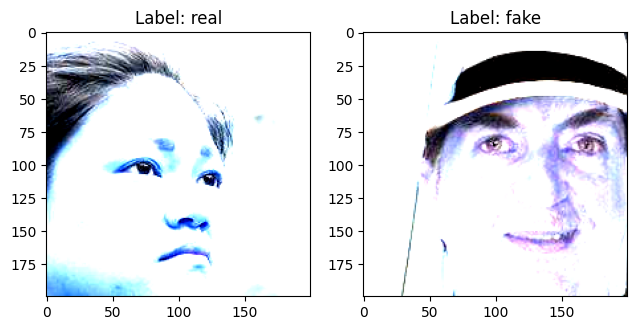

In [ ]:
#or alternatively
import torchvision

fig, axes = plt.subplots(1, 2, figsize=(1.5*5,2*2))

visited_labels = set()
train_loader_iter = iter(train_loader)

while len(visited_labels) < 2:
    (features,idx), labels = next(train_loader_iter)
    for i, label in enumerate(labels):
        if label not in visited_labels:
            ax = axes[len(visited_labels)]
            visited_labels.add(label)
            ax.imshow(features[i].permute(1, 2, 0), cmap='gray')
            ax.set_title('Label: {}'.format(label))
            print(idx[i])
plt.show()           

In [ ]:
#high_pass_filter

#visualize one image from each class
import torchvision

img = []
visited_labels = set()
train_loader_iter = iter(test_loader)

while len(visited_labels) < 2:
    (features, idx), labels = next(train_loader_iter)
    for i, label in enumerate(labels):
        if label not in visited_labels:
            visited_labels.add(label)
            img.append(features[i])
            print(label, idx[i])
            
img = torchvision.utils.make_grid(img)
plt.imshow(img.permute(1, 2, 0))

In [ ]:
#to_hsv

#visualize one image from each class
import torchvision

img = []
visited_labels = set()
train_loader_iter = iter(test_loader)

while len(visited_labels) < 2:
    (features, idx), labels = next(train_loader_iter)
    for i, label in enumerate(labels):
        if label not in visited_labels:
            visited_labels.add(label)
            img.append(features[i])
            print(label, idx[i])
            
img = torchvision.utils.make_grid(img)
plt.imshow(img.permute(1, 2, 0))

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ShallowNetV3(nn.Module):
    def __init__(self):
        super(ShallowNetV3, self).__init__()
        
        self.block1 = nn.Sequential(
            #bs * 3 * 200 * 200
            nn.Conv2d(3, 32, 5, padding=0),
            #32 * (200-4) * (200-4)
            nn.ReLU(),
            nn.Dropout(0.25),
            nn.Conv2d(32, 32, 1),
            #32 * (200-4) * (200-4)
            nn.ReLU(),
            nn.Dropout(0.25),
            nn.Conv2d(32, 32, 1),
            #32 * (200-4) * (200-4)
            nn.ReLU(),
            nn.MaxPool2d(2),
            #32 * (196/2) * (196/2)
            nn.Dropout(0.25)
        )
        
        self.block2 = nn.Sequential(
            #32 * (196/2) * (196/2)
            nn.Conv2d(32, 64, 3, padding=0),
            #64 * (98-2) * (98-2)
            nn.ReLU(),
            nn.Dropout(0.25),
            nn.Conv2d(64, 64, 1),
            nn.ReLU(),
            nn.Dropout(0.25),
            nn.Conv2d(64, 64, 1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            #64 * 48 * 48
            nn.Dropout(0.25)
        )
        
        self.block3 = nn.Sequential(
            nn.Conv2d(64, 128, 3, padding=0),
            #128 * 46 * 46
            nn.ReLU(),
            nn.Dropout(0.25),
            nn.Conv2d(128, 32, 1),
            #32 * 46 * 46
            nn.ReLU(),
            nn.Dropout(0.25)
        )
        
        self.block4 = nn.Sequential(
            # nn.Linear(32 * 6 * 6, 1024),
            nn.Linear(32 * 46 * 46, 1024),
            nn.ReLU(),
            nn.BatchNorm1d(1024),
            nn.Dropout(0.25),
            nn.Linear(1024, 2),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = x.view(x.size(0), -1)  # Flatten
        x = self.block4(x)
        return x

model = ShallowNetV3()
print(model)

ShallowNetV3(
  (block1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): Dropout(p=0.25, inplace=False)
    (3): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
    (4): ReLU()
    (5): Dropout(p=0.25, inplace=False)
    (6): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Dropout(p=0.25, inplace=False)
  )
  (block2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Dropout(p=0.25, inplace=False)
    (3): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
    (4): ReLU()
    (5): Dropout(p=0.25, inplace=False)
    (6): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Dropout(p=0.25, inplace=False)
  )
  (block3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stri

In [12]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [15]:
import torch.optim as optim
import torchvision.models as models

# Define the ResNet18 model
model = ShallowNetV3()

model.to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [16]:
epochs = 50

train_losses = []
train_accs = []

test_losses = []
test_accs  = []

test_predictions = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    batch_corr = 0
    
    for batch_idx, ((X_train, idx), y_train) in enumerate(train_loader):

        y_train = list(y_train)

        for j in range(len(y_train)):
            if y_train[j] == 'real':
                y_train[j] = 0
            else:
                y_train[j] = 1

        y_train = torch.tensor(np.asarray(y_train))

        X_train, y_train = X_train.to(device), y_train.to(device)

        # y_pred = model(X_train.view(100, -1))
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
        
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
           
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_idx % 10 == 0:
            
            if batch_idx == 0:
                batch_accuracy = 0
            else:
                #batch accuracy
                batch_accuracy = trn_corr.item()*100 / (batch_idx * len(X_train))
            
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\tAccuracy: {:.6f}'.format(
                i, batch_idx * len(X_train), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item(), batch_accuracy))

    accuracy = trn_corr.item()*100 / (len(train_dataset))

    train_losses.append(loss)
    train_accs.append(accuracy)

    with torch.no_grad():
      
        for (X_test,idx), y_test in test_loader:
          
            y_test = list(y_test)

            for j in range(len(y_test)):
                if y_test[j] == 'real':
                    y_test[j] = 0
                else:
                    y_test[j] = 1

            y_test = torch.tensor(np.asarray(y_test))

            X_test, y_test = X_test.to(device), y_test.to(device)
            
            y_val = model(X_test)
            
            predicted = torch.max(y_val.data, 1)[1]
            tst_corr += (predicted == y_test).sum()

            if i == epochs - 1:
                test_predictions.extend(predicted.cpu().numpy())

    test_accuracy = tst_corr.item()*100 / (len(test_dataset))

    val_loss = criterion(y_val,y_test)
    test_losses.append(val_loss)
    test_accs.append(test_accuracy)
    print( f'epoch: {i} training loss:{loss.item()} training accuracy:{accuracy} val loss:{val_loss.item()} val accuracy:{test_accuracy}')
    # print( f'epoch: {i} training loss:{loss.item()} training accuracy:{accuracy}')

Train Epoch: 0 [0/2400 (0%)]	Loss: 0.689395	Accuracy: 0.000000
Train Epoch: 0 [640/2400 (26%)]	Loss: 0.650887	Accuracy: 61.718750
Train Epoch: 0 [1280/2400 (53%)]	Loss: 0.635568	Accuracy: 61.328125
Train Epoch: 0 [1920/2400 (79%)]	Loss: 0.674030	Accuracy: 61.041667
epoch: 0 training loss:0.6278558373451233 training accuracy:59.708333333333336 val loss:0.7232698202133179 val accuracy:51.52777777777778
Train Epoch: 1 [0/2400 (0%)]	Loss: 0.659909	Accuracy: 0.000000
Train Epoch: 1 [640/2400 (26%)]	Loss: 0.658688	Accuracy: 71.875000
Train Epoch: 1 [1280/2400 (53%)]	Loss: 0.653822	Accuracy: 66.953125
Train Epoch: 1 [1920/2400 (79%)]	Loss: 0.608740	Accuracy: 67.135417
epoch: 1 training loss:0.6894063949584961 training accuracy:64.79166666666667 val loss:0.7667993307113647 val accuracy:51.25
Train Epoch: 2 [0/2400 (0%)]	Loss: 0.601545	Accuracy: 0.000000
Train Epoch: 2 [640/2400 (26%)]	Loss: 0.632142	Accuracy: 72.812500
Train Epoch: 2 [1280/2400 (53%)]	Loss: 0.610253	Accuracy: 68.437500
Train E

In [13]:
test_losses = []
test_accs  = []

tst_corr = 0

with torch.no_grad():
      
    for (X_test,idx), y_test in test_loader:
      
        y_test = list(y_test)

        for j in range(len(y_test)):
            if y_test[j] == 'real':
                y_test[j] = 0
            else:
                y_test[j] = 1

        y_test = torch.tensor(np.asarray(y_test))

        X_test, y_test = X_test.to(device), y_test.to(device)
        
        y_val = model(X_test)
        
        predicted = torch.max(y_val.data, 1)[1]
        tst_corr += (predicted == y_test).sum()

        test_predictions.extend(predicted.cpu().numpy())

test_accuracy = tst_corr.item()*100 / (len(test_dataset))

val_loss = criterion(y_val,y_test)
test_losses.append(val_loss)
test_accs.append(test_accuracy)
print( f'epoch: {i} training loss:{loss.item()} training accuracy:{accuracy} val loss:{val_loss.item()} val accuracy:{test_accuracy}')

epoch: 49 training loss:0.31573158502578735 training accuracy:98.25 val loss:0.7184744477272034 val accuracy:52.5


In [16]:
#save to new csv

test_predictions_df = pd.DataFrame(test_predictions, columns=['original_data'])

test_predictions_df.to_csv('/content/drive/MyDrive/2023_Spring/Advanced_Topics_in_DS/Project/small_processed_data/shallownet.csv', index=False)

In [17]:
# to existing csv

existing_df = pd.read_csv('/content/drive/MyDrive/2023_Spring/Advanced_Topics_in_DS/Project/small_processed_data/shallownet.csv')

assert len(test_predictions) == len(existing_df), "The number of predictions and the number of rows in the existing DataFrame must match."

# name to be changed
existing_df['to_hsv'] = test_predictions

existing_df.to_csv('/content/drive/MyDrive/2023_Spring/Advanced_Topics_in_DS/Project/small_processed_data/shallownet.csv', index=False)